In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import ast
from datetime import datetime
import time
from scipy import stats


from PIL import Image

import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\movies_metadata.csv')
df.head(1)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                               homepage   id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  862  tt0114709                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   

  release_date      revenue runtime                          spoken_languages  \
0   1995-10-30  373554033.0    81.0  [{'iso_639_1': 'en', 'name': 'English'}]   

     status  tagline      title  video vote_average vote_count  
0  Released      NaN  Toy Story  False          7.7     5415.0  

[1 rows x 24 columns]

In [3]:
def genre_counter (df_col):
    """
                        ---What it does---
    Counts the number of times the film genres appears in the df, combinations will not be counted.
                        
                        ---What it needs---
    A df column to scan. The column MUST contain strings, otherwise it will not count anything.
                        
                        ---What it returns---
    A new df called genre_counts composed of both the genres searched and the times they appear.
    """
    # List of film genres from amc fimsite. Fantasy genre added to main film genres by author of DAANMO project
    action = 0
    adventure = 0
    comedy = 0
    crime = 0
    drama = 0
    documentary = 0
    fantasy = 0
    historical = 0
    horror = 0
    musicals = 0
    romance = 0
    scifi = 0
    war = 0
    western = 0

    # Counter
    for i in df_col:
        if i == 'Action':
            action += 1
        elif i == 'Adventure':
            adventure += 1
        elif i == 'Comedy':
            comedy += 1
        elif i == 'Crime':
            crime += 1
        elif i == 'Drama':
            drama += 1
        elif i == 'Documentary':
            documentary += 1
        elif i == 'Fantasy':
            fantasy += 1
        elif i == 'Historical':
            historical += 1
        elif i == 'Horror':
            horror += 1
        elif i == 'Musical':
            musical += 1
        elif i == 'Science Fiction':
            scifi += 1
        elif i == 'War':
            war += 1
        elif i == 'Western':
            western += 1

    #df to return
    genre_counts = pd.DataFrame({'Genres': ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Documentary', 'Fantasy', 'Historical', 'Horror', 'Musical', 'Romance', 'Science Fiction', 'War', 'Western'], 'Counts': [action, adventure, comedy, crime, drama, documentary, fantasy, historical, horror, musicals, romance, scifi, war, western]})
    return genre_counts

In [4]:
def null_count (df):
    """
                        ---What it does---
    Identifies and counts the number of null values in any given df. Does not return anything.

                        ---What it needs---
    A DataFrame
    """
    null_in_df = df.isnull().any()
    is_null = df.isnull().sum()
    print (f'Presence of null in clolumns:\n{null_in_df}\n\nNumber of null in columns:\n{is_null}')

def df_save (df):
    """
                        ---What it does---
    Saves your df of choice to a .csv file in the same directory of the parent file

                        ---What it needs---
    * Your input for the name (be careful with adding spaces)
    * Your ready-to-save df
    """
    name = input("Type the name of your df> ")
    name = name + "_ready.csv"
    df.to_csv(name, sep = ',')

In [5]:
null_count(df)

Presence of null in clolumns:
adult                    False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
id                       False
imdb_id                   True
original_language         True
original_title           False
overview                  True
popularity                True
poster_path               True
production_companies      True
production_countries      True
release_date              True
revenue                   True
runtime                   True
spoken_languages          True
status                    True
tagline                   True
title                     True
video                     True
vote_average              True
vote_count                True
dtype: bool

Number of null in columns:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0


# Profit

In [6]:
profit = df[['id', 'budget', 'revenue']]

In [7]:
profit.budget.value_counts()

0            36573
5000000        286
10000000       259
20000000       243
2000000        242
             ...  
163000000        1
1884000          1
1353676          1
3005000          1
935000           1
Name: budget, Length: 1226, dtype: int64

In [8]:
profit.revenue.value_counts()

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6863, dtype: int64

In [9]:
profit[pd.to_numeric(profit['budget'],errors='coerce').isnull()]['budget']

19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

In [10]:
a = profit.iloc[29503, 1:4]
b = profit.iloc[19730 , 1:4]
c = profit.iloc[35587 , 1:4]

a, b, c

(budget     /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
 revenue                                 NaN
 Name: 29503, dtype: object, budget     /ff9qCepilowshEtG2GYWwzt2bs4.jpg
 revenue                                 NaN
 Name: 19730, dtype: object, budget     /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
 revenue                                 NaN
 Name: 35587, dtype: object)

In [11]:
profit = profit.drop(19730)
profit = profit.drop(29503) 
profit = profit.drop(35587)
print ("j.peg columns dropped")

j.peg columns dropped


In [12]:
profit.head()

id    budget      revenue
0    862  30000000  373554033.0
1   8844  65000000  262797249.0
2  15602         0          0.0
3  31357  16000000   81452156.0
4  11862         0   76578911.0

In [13]:
 profit.budget.dtype

dtype('O')

In [14]:
profit.budget = pd.to_numeric(profit.budget, errors='coerce')
profit.budget.dtype

dtype('int64')

In [15]:
profit['budget'] = profit['budget'].replace(0, np.nan)
profit['revenue'] = profit['revenue'].replace(0, np.nan)

profit

id      budget      revenue
0         862  30000000.0  373554033.0
1        8844  65000000.0  262797249.0
2       15602         NaN          NaN
3       31357  16000000.0   81452156.0
4       11862         NaN   76578911.0
...       ...         ...          ...
45461  439050         NaN          NaN
45462  111109         NaN          NaN
45463   67758         NaN          NaN
45464  227506         NaN          NaN
45465  461257         NaN          NaN

[45463 rows x 3 columns]

In [16]:
profit['profit'] = profit['revenue'] - profit['budget']
profit = profit.dropna()

profit

id      budget      revenue       profit
0         862  30000000.0  373554033.0  343554033.0
1        8844  65000000.0  262797249.0  197797249.0
3       31357  16000000.0   81452156.0   65452156.0
5         949  60000000.0  187436818.0  127436818.0
8        9091  35000000.0   64350171.0   29350171.0
...       ...         ...          ...          ...
45250   24049  12000000.0   19000000.0    7000000.0
45399  280422    750000.0          3.0    -749997.0
45409   62757    800000.0    1328612.0     528612.0
45412   63281   2000000.0    1268793.0    -731207.0
45422   63898   5000000.0    1413000.0   -3587000.0

[5381 rows x 4 columns]

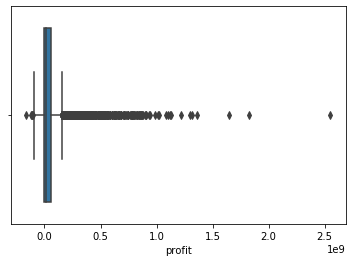

In [17]:
sns.boxplot(profit['profit'])

This is extremely irregular, further clean-up is required. For that, the z-score method of detecting outliers must be used

In [18]:
z = np.abs(stats.zscore(profit['revenue']))
z2 = np.abs(stats.zscore(profit['budget']))
z3 = np.abs(stats.zscore(profit['profit']))

threshold = 3
z_t = np.array(np.where(z > threshold))
z_t2 = np.array(np.where(z2 > threshold))
z_t3 = np.array(np.where(z3 > threshold))


print(z_t, '\n', z_t2, '\n', z_t3)


[[ 102  136  139  175  251  373  532  590  965 1013 1678 1703 1787 1793
  1907 1935 2009 2013 2035 2188 2228 2319 2324 2356 2419 2586 2608 2689
  2696 2742 2782 2794 2886 2925 2974 2982 2984 3009 3011 3141 3174 3177
  3186 3192 3258 3364 3378 3381 3388 3470 3476 3495 3542 3579 3599 3601
  3602 3608 3692 3694 3795 3804 3815 3825 3837 3885 3935 3953 3954 3961
  4036 4052 4066 4067 4076 4135 4142 4149 4233 4244 4257 4261 4268 4312
  4345 4353 4354 4358 4418 4430 4441 4459 4467 4469 4481 4487 4495 4500
  4560 4573 4586 4600 4643 4646 4647 4650 4651 4652 4653 4711 4751 4767
  4769 4773 4775 4783 4799 4803 4811 4815 4903 4999 5059 5214 5220 5238
  5265 5271 5309 5345 5368]] 
 [[  85  525  590  987 1029 2033 2269 2271 2356 2420 2429 2696 2697 2781
  2783 2794 2802 2974 2982 2984 3008 3084 3141 3172 3174 3184 3264 3336
  3358 3364 3388 3402 3468 3470 3495 3542 3562 3579 3587 3599 3601 3608
  3692 3694 3703 3709 3732 3804 3816 3821 3825 3832 3885 3922 3954 4007
  4026 4036 4037 4054 4066 4076 4

As the z-score results show, there are a big number of outliers in the profit df. Before removal, it is necessary to accertain whether or not such removal will endanger significatly the results. For that the shape of the arrays must be calculated and compare to that of the parent df. Then, a copy of the df must be made including the zscores.

In [19]:
z_t.shape, z_t2.shape, z_t3.shape, profit.shape

((1, 131), (1, 123), (1, 127), (5381, 4))

In [146]:
def zscore_nuke (df):
    """
                        ---What it does---
    This function will add a zscore column to the df of choice, then loc the values that are bellow the threshold (3) and store them in a new df object. Lastly, the zscore columns will be droped.

    It only does it with 2 columns at the moment.

                        ---What it needs---
    -A df object"""
    threshold = 3

    column1 = input('Column1 name here: ')
    df['column1_zscore'] = np.abs(stats.zscore(df[column1]))

    column2 = input('Column2 name here: ')
    df['column2_zscore'] = np.abs(stats.zscore(df[column2]))

    df2 = df[(df.column1_zscore <= threshold) & (df.column2_zscore <= threshold)]

    df = df.drop(['column1_zscore', 'column1_zscore'], axis=1)

    return df2

In [155]:
profit_o = zscore_nuke(df = profit)

In [156]:
profit_o

id      budget      revenue       profit  column1_zscore  \
0         862  30000000.0  373554033.0  343554033.0        0.027262   
1        8844  65000000.0  262797249.0  197797249.0        0.844276   
3       31357  16000000.0   81452156.0   65452156.0        0.375877   
5         949  60000000.0  187436818.0  127436818.0        0.719771   
8        9091  35000000.0   64350171.0   29350171.0        0.097244   
...       ...         ...          ...          ...             ...   
45250   24049  12000000.0   19000000.0    7000000.0        0.475481   
45399  280422    750000.0          3.0    -749997.0        0.755618   
45409   62757    800000.0    1328612.0     528612.0        0.754373   
45412   63281   2000000.0    1268793.0    -731207.0        0.724492   
45422   63898   5000000.0    1413000.0   -3587000.0        0.649789   

       column2_zscore  
0            1.704938  
1            1.038238  
3            0.053369  
5            0.584606  
8            0.156314  
...               ...  
45250        0.429299  
45399        0.543670  
45409        0.535672  
45412        0.536032  
45422        0.535164  

[5190 rows x 6 columns]

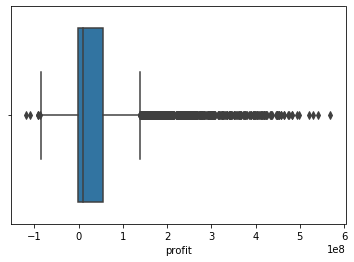

In [158]:
sns.boxplot(profit_o['profit']);

# Popularity

In [83]:
df.popularity.dtype

dtype('O')

In [84]:
popularity_df = df[['id', 'popularity']]
# popularity_df = popularity_df.set_index('id')
popularity_df.head(1)

id popularity
0  862    21.9469

In [85]:
prob_rows = popularity_df[pd.to_numeric(popularity_df['popularity'],errors='raise').isnull()]['popularity']
prob_rows

ValueError: Unable to parse string "Beware Of Frost Bites" at position 35587

In [86]:
popularity_df = popularity_df.dropna()

In [87]:
popularity_df = popularity_df.drop(35587)

In [88]:
popularity_df.isnull().any(), popularity_df.popularity.dtype


(id            False
 popularity    False
 dtype: bool, dtype('O'))

In [89]:
popularity_df['popularity'] = pd.to_numeric(popularity_df['popularity'], errors='coerce')
popularity_df['popularity'].dtype

dtype('float64')

In [90]:
data = popularity_df.popularity.describe()
data

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [91]:
# function dormant
# df_save(popularity_df)

# Genres

In [92]:
genres = pd.DataFrame(df[['id', 'genres']])
genres['genres'] = genres['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [93]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
id        45466 non-null object
genres    45466 non-null object
dtypes: object(2)
memory usage: 710.5+ KB


In [94]:
genres['genres'].value_counts()

[Drama]                                                                           5000
[Comedy]                                                                          3621
[Documentary]                                                                     2723
[]                                                                                2442
[Drama, Romance]                                                                  1301
                                                                                  ... 
[Drama, Thriller, Documentary]                                                       1
[Crime, Action, Horror, Thriller]                                                    1
[Action, Comedy, Thriller, Documentary]                                              1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [95]:
for e in range(45466):
    genres['genres'][e]= ', '.join(genres['genres'][e])

genres['genres'].head()

0     Animation, Comedy, Family
1    Adventure, Fantasy, Family
2               Romance, Comedy
3        Comedy, Drama, Romance
4                        Comedy
Name: genres, dtype: object

In [ ]:
genres = genres.replace('', np.NaN).dropna(how='all')

In [98]:
genres.head()

id                      genres
0    862   Animation, Comedy, Family
1   8844  Adventure, Fantasy, Family
2  15602             Romance, Comedy
3  31357      Comedy, Drama, Romance
4  11862                      Comedy

In [99]:
genres_count = genres.genres.value_counts().head(10)
genres_count

Drama                     5000
Comedy                    3621
Documentary               2723
Drama, Romance            1301
Comedy, Drama             1135
Horror                     974
Comedy, Romance            930
Comedy, Drama, Romance     593
Drama, Comedy              532
Horror, Thriller           528
Name: genres, dtype: int64

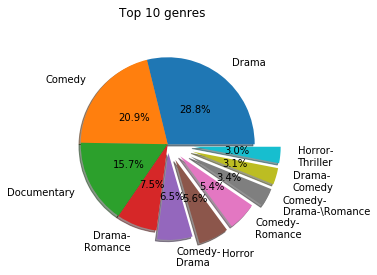

In [100]:
labels = 'Drama', 'Comedy', 'Documentary', 'Drama-\nRomance', 'Comedy-\nDrama', 'Horror', 'Comedy-\nRomance', 'Comedy-\nDrama-\Romance', 'Drama-\nComedy', 'Horror-\nThriller', 
explode = (0, 0, 0, 0, 0.1, 0.2, 0.2, 0.3, 0.3, 0.3)
plt.pie(genres_count,  autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Top 10 genres', fontsize=12)

plt.show();

The Top 10 most popular types of films seems to contain elements of Drama and Comedy. It seems however that the data was not uniformaly registered, as it can be observed the appearence of both "Comedy-Drama" and "Drama-Comedy". This could be considered an error, however it should be taken into account that, given the subject matter, it may refer to the predominance of one element over the other. E g. a Comedy-Drama could be more focused on Comedy, while a Drama-Comedy is concieved as a Drama first and a Comedy second.

In [101]:
genres.shape

(45466, 2)

In [102]:
genre_count = genre_counter(df_col = genres['genres'])
genre_count = genre_count.sort_values(by= 'Counts', ascending= False).reset_index(drop= True)
genre_count

Genres  Counts
0             Drama    5000
1            Comedy    3621
2       Documentary    2723
3            Horror     974
4           Western     318
5            Action     278
6   Science Fiction     198
7             Crime     134
8         Adventure     110
9           Fantasy      51
10              War      37
11       Historical       0
12          Musical       0
13          Romance       0

In [103]:
genre_count2 = genre_count.loc[genre_count.Counts > 0]

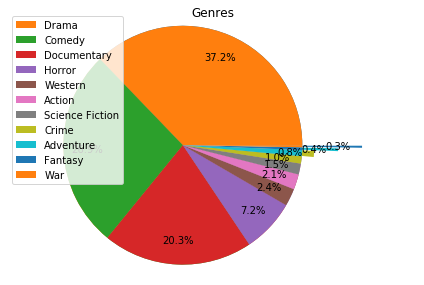

In [104]:
labels = genre_count2.Genres 
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.5)
plt.pie(genre_count2.Counts, autopct='%1.1f%%',  explode =  explode, pctdistance = 0.8)
patches, texts = plt.pie(genre_count2.Counts)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.suptitle('Genres', fontsize=12)

plt.show();

In [105]:
genres_unique = df['genres']
genres_unique = genres_unique.dropna()
genres_unique= genres_unique.dropna().apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genres_unique

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object

In [106]:
genres_unique_2 = []

for e in genres_unique:
    for i in e:
        genres_unique_2.append(i)
genres_unique_2 = pd.DataFrame({'Genres': genres_unique_2}).drop_duplicates(keep = 'first')
genres_unique_2 = genres_unique_2.reset_index(drop = True)

In [107]:
genres_unique_2

Genres
0                               Animation
1                                  Comedy
2                                  Family
3                               Adventure
4                                 Fantasy
5                                 Romance
6                                   Drama
7                                  Action
8                                   Crime
9                                Thriller
10                                 Horror
11                                History
12                        Science Fiction
13                                Mystery
14                                    War
15                                Foreign
16                                  Music
17                            Documentary
18                                Western
19                               TV Movie
20                   Carousel Productions
21              Vision View Entertainment
22       Telescene Film Group Productions
23                                Aniplex
24                                GoHands
25                              BROSTA TV
26  Mardock Scramble Production Committee
27                       Sentai Filmworks
28                          Odyssey Media
29                     Pulser Productions
30                            Rogue State
31                             The Cartel

In [108]:
to_drop = []
for i in range(12):
    a = 20
    nuke = genres_unique_2.iloc[a + i, 0]
    to_drop.append(nuke)
to_drop

['Carousel Productions',
 'Vision View Entertainment',
 'Telescene Film Group Productions',
 'Aniplex',
 'GoHands',
 'BROSTA TV',
 'Mardock Scramble Production Committee',
 'Sentai Filmworks',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'The Cartel']

In [109]:
genres.loc[genres.genres == 'Mardock Scramble Production Committee']

Empty DataFrame
Columns: [id, genres]
Index: []

All studios seem to be hidden into the lists of genres, making them impossible to track. As they should not harm the analysis much, no further effort is required

In [110]:
genres_unique_2 = genres_unique_2.drop(genres_unique_2.index[20: 31])

In [111]:
genres_unique_2.tail()

Genres
16        Music
17  Documentary
18      Western
19     TV Movie
31   The Cartel

In [112]:
# function dormant
# df_save(genres)
# df_save(genres_unique_2)

# Production countries

In [113]:
df.production_countries

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [114]:
countries = df [['id', 'production_countries', 'original_language']]
countries['production_countries'] = countries['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
countries = pd.DataFrame(countries.dropna())

countries.head()

id        production_countries original_language
0    862  [United States of America]                en
1   8844  [United States of America]                en
2  15602  [United States of America]                en
3  31357  [United States of America]                en
4  11862  [United States of America]                en

In [115]:
productions = countries['production_countries'].value_counts().head(11)
productions

[United States of America]                    17848
[]                                             6286
[United Kingdom]                               2238
[France]                                       1652
[Japan]                                        1356
[Italy]                                        1030
[Canada]                                        840
[Germany]                                       749
[India]                                         735
[Russia]                                        735
[United Kingdom, United States of America]      569
Name: production_countries, dtype: int64

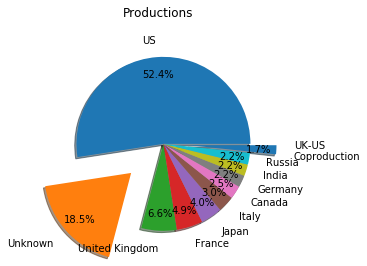

In [116]:
labels = 'US', 'Unknown', 'United Kingdom', 'France', 'Japan', 'Italy', 'Canada', 'Germany', 'India', 'Russia', 'UK-US\nCoproduction'
explode = 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.3
plt.pie(productions, autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 0.8, labeldistance = 1.2)
plt.suptitle('Productions', fontsize=12)

plt.show();

While 1/5th of the data is non-readable (no value is assigned to it), it is has become quite clear the predominance and importance of the american film industry. Indeed if we take a quick look at the pie, we can see how even accounting for the missing data, no other country comes even close to the US in this matter.

In [117]:
languages = pd.DataFrame(countries['original_language'].value_counts())
languages_10 = languages.head(10)
languages_10

original_language
en              32269
fr               2438
it               1529
ja               1350
de               1080
es                994
ru                826
hi                508
ko                444
zh                409

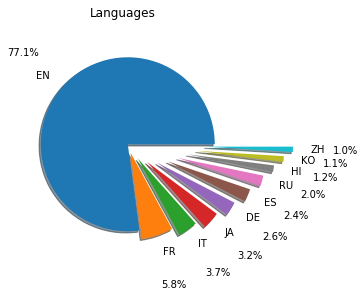

In [118]:
explode = (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
labels = 'EN', 'FR', 'IT', 'JA', 'DE', 'ES', 'RU', 'HI', 'KO', 'ZH'
plt.pie(languages_10,  autopct='%1.1f%%', startangle=0, labels= labels, explode = explode, shadow= True, pctdistance = 1.6, labeldistance = 1.2)
plt.suptitle('Languages', fontsize=12)

plt.show();


As the language chart corroborates, the english speaking market is by far the most numerous. Also some of the position for the countries/languages has shifted a bit (most notably the smaller film industries), and the spanish speaking market makes a sudden appearance ahead of the russian or hindu markets

In [119]:
# Function dormant
# df_save(countries)

# Profit by genre

In [120]:
profit_genre = pd.merge(profit, genres, on='id', how='inner')

In [121]:
profit_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5393 entries, 0 to 5392
Data columns (total 7 columns):
id                5393 non-null object
budget            5393 non-null float64
revenue           5393 non-null float64
profit            5393 non-null float64
column1_zscore    5393 non-null float64
column2_zscore    5393 non-null float64
genres            5381 non-null object
dtypes: float64(5), object(2)
memory usage: 337.1+ KB


In [122]:
profit_genre.columns = ['Id', 'Budget', 'Revenue', 'Profit', 'Genre']
profit_genre.head()

ValueError: Length mismatch: Expected axis has 7 elements, new values have 5 elements

In [123]:
profit_gen = profit_genre.groupby('Genre').Profit.sum().sort_values(ascending = False).head(10)
profit_gen

KeyError: 'Genre'

In [124]:
profit_gen2 = pd.DataFrame(profit_gen.loc[profit_gen > 10000])
profit_gen2.head(1)

Profit
Genre               
Comedy  1.371178e+10

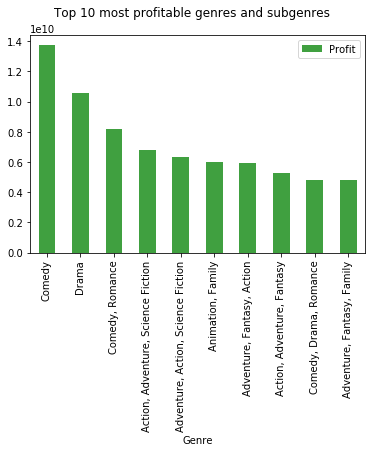

In [125]:
profit_gen2.plot(kind='bar', color = 'green', alpha = 0.75)
plt.suptitle('Top 10 most profitable genres and subgenres', fontsize=12);

In [126]:
# Function dormant
# df_save(profit_gen)

# Realease Dates and runtime

In [127]:
dates = pd.DataFrame(df[['id', 'release_date', 'runtime']])
dates = dates.set_index('id')
dates.head()

release_date  runtime
id                         
862     1995-10-30     81.0
8844    1995-12-15    104.0
15602   1995-12-22    101.0
31357   1995-12-22    127.0
11862   1995-02-10    106.0

In [128]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, 862 to 461257
Data columns (total 2 columns):
release_date    45379 non-null object
runtime         45203 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [129]:
sample = dates.release_date.iloc[2]
sample

'1995-12-22'

In [130]:
sample = datetime.strptime(sample, '%Y-%m-%d')
sample

datetime.datetime(1995, 12, 22, 0, 0)

In [131]:
dates.release_date.dtype

dtype('O')

In [132]:
pd.to_datetime(dates.release_date, format='%Y%m%d', errors='ignore')

id
862       1995-10-30
8844      1995-12-15
15602     1995-12-22
31357     1995-12-22
11862     1995-02-10
             ...    
439050           NaN
111109    2011-11-17
67758     2003-08-01
227506    1917-10-21
461257    2017-06-09
Name: release_date, Length: 45466, dtype: object

# Vote average

In [133]:
votes = df[['id', 'vote_average', 'vote_count']]
votes.head(1)

id  vote_average  vote_count
0  862           7.7      5415.0

In [134]:
null_count(votes)

Presence of null in clolumns:
id              False
vote_average     True
vote_count       True
dtype: bool

Number of null in columns:
id              0
vote_average    6
vote_count      6
dtype: int64


In [135]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
id              45466 non-null object
vote_average    45460 non-null float64
vote_count      45460 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB


This df refers to the number of people who voted the score or quality of a given film.

In [136]:
votes = votes.dropna()

In [137]:
rounder =lambda x: round(x)
vote_average_count = votes.vote_average.apply(rounder).value_counts()
vote_average_count

6     15675
7     10229
5      7343
8      3831
4      3506
0      3011
3       817
2       413
9       296
10      210
1       129
Name: vote_average, dtype: int64

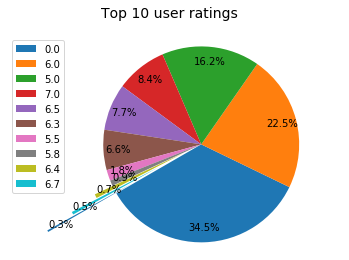

In [138]:
# Labels
labels = 0.0, 6.0, 5.0, 7.0, 6.5, 6.3, 5.5, 5.8, 6.4, 6.7 
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.49, 0.8)  

# Plot
plt.pie(vote_average_count, explode= explode, autopct = '%1.1f%%', startangle = 210, pctdistance = 0.85)

# Legends and titles
plt.legend(labels, loc= 'best')

plt.suptitle('Top 10 user ratings', fontsize = 14)
plt.axis('equal')
plt.show()

In [139]:
votes['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [140]:
votes['id'].loc[votes['vote_count'] < 30]

29        37557
32        78802
34        47018
36       139405
39        34615
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 33039, dtype: object

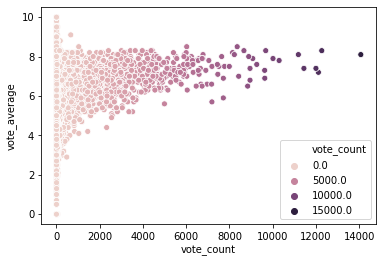

In [141]:
ax = sns.scatterplot(x=votes['vote_count'], y=votes['vote_average'], hue=votes['vote_count'])

In [142]:
# function dormant
# df_save(votes)

The data clearly states that the majority of the users rates movies quality from 6 to 8. A somewhat different scaling system to that of the movie critics (even accounting for differences in scale). It is also noticebale the almost lack of presence of 10's, 3's and bellow values, suggesting a more generous yet not so forggiving rating system.